<h2 style="text-align:left;padding:10px;background-color:#154949;color:#ffe;border-radius:5px;font:bold;font-size:2.25em">
Libraries

</h2>

In [50]:
# Time 
from time import time

# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling
from imblearn.over_sampling import RandomOverSampler

# transformers
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder,OrdinalEncoder

# models
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# metrics
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    accuracy_score
)

# warnings 
import warnings 
warnings.filterwarnings("ignore")

# Configurations
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("airline_passenger_satisfaction.csv").set_index("ID")
description = pd.read_csv("data_dictionary.csv").set_index("Field")

-------------------

<h2 style="text-align:left;padding:10px;background-color:#154949;color:#ffe;border-radius:5px;font:bold;font-size:2.25em">
Exploring

</h2>

In [3]:
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
description

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger seat
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


In [5]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> - There are 4 numerical columns [discrete] <br>
> - There are 18 Categorical Columns [3 nominal beside `Satisfaction` & 14 ordinal]

In [7]:
non_cat_columns =["Age","Flight Distance","Departure Delay","Arrival Delay"]

In [8]:
# for i in df.columns:
#     if i not in ["Age","Flight Distance","Departure Delay","Arrival Delay"]:
#         df[i]=df[i].astype("category")

In [9]:
df.columns[df.isna().sum()>0]

Index(['Arrival Delay'], dtype='object')

In [47]:
df.isna().sum().sum()

393

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> - Only one Column `Arrival Delay` that has NAN values 

In [10]:
df["Satisfaction"].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [11]:
df["Satisfaction"] = df["Satisfaction"].apply(lambda x: 1 if x=='Satisfied' else  0).astype("bool")

In [12]:
df["Satisfaction"].value_counts()

False    73452
True     56428
Name: Satisfaction, dtype: int64

In [14]:
df[non_cat_columns].describe()

,Age,Flight Distance,Departure Delay,Arrival Delay
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> These insights are numerical [ we will use visualization to make it more obvious ]
>> - `Age` column seems to be symmetric [ we know that from mean & median relation ]
>> - `Flight distance` may be skewed a little 
>> - `Departure & arrival Delay` are obviously skewed

In [49]:
df.drop(columns=non_cat_columns).astype("category").describe()

,Gender,Customer Type,Type of Travel,Class,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,6,6,6,5,2
top,Female,Returning,Business,Business,4,3,4,4,3,4,4,4,4,4,4,2,4,4,False
freq,65899,106100,89693,62160,31880,30393,36333,38468,35717,38703,39756,35886,33969,30563,47323,32320,36791,46761,73452


<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> - Most frequent observations [ from data ] are `females`
> - Most frequent observations have given rates of `4`
> - Most frequent observations use `Business class`
> - `Most` `Almost 80%` observations of passengers are `returning` and not their first time [ Most have flown before ]
> - More frequent observations are `unsatisfied`

In [15]:
# df.select_dtypes("category").describe()

In [46]:
df.duplicated().sum()

0

-------------------

<h2 style="text-align:left;padding:10px;background-color:#154949;color:#ffe;border-radius:5px;font:bold;font-size:2.25em">
Visualization

</h2>

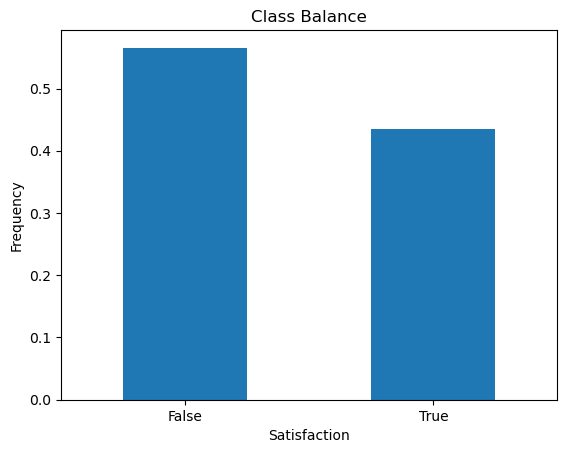

In [16]:
# fig,ax = plt.subplots(figsize=(5,5))
df["Satisfaction"].value_counts(normalize=True).plot(kind="bar",
                                                     xlabel="Satisfaction",
                                                     ylabel="Frequency"
                                                     ,title="Class Balance")
plt.xticks(rotation=0);

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> - As we mentioned above most people are `unsatisfied` [ not by far ]

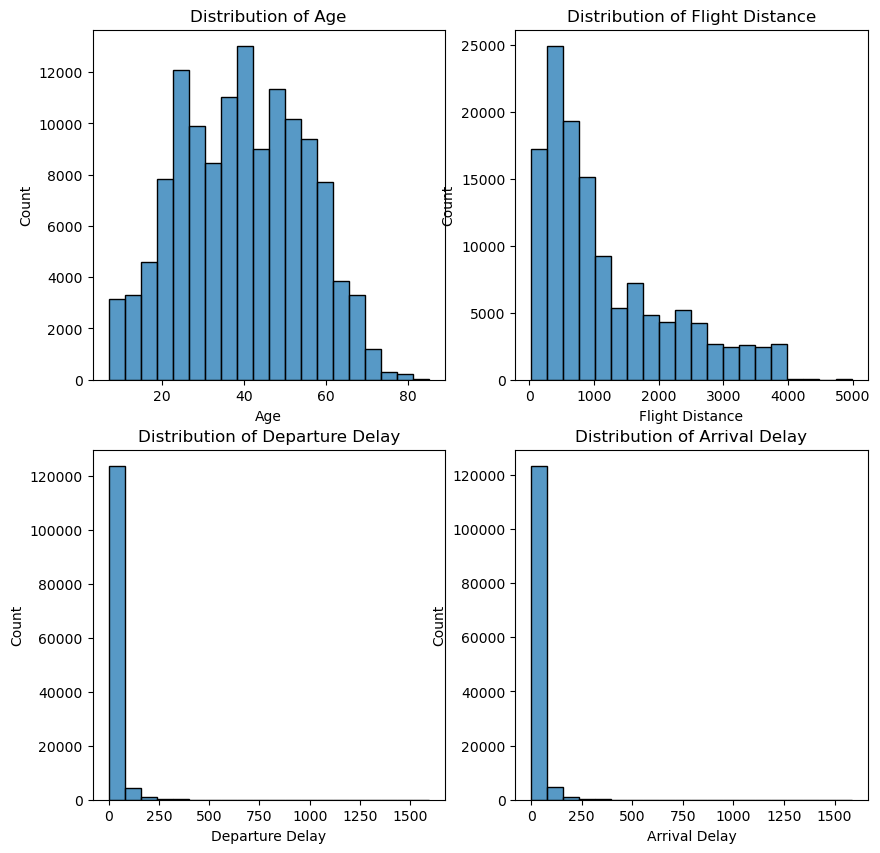

In [17]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
# for ind,i in enumerate(df.select_dtypes("number").columns):
for ind,i in enumerate(df[non_cat_columns]):
    sns.histplot(data=df,x=i,ax=ax[ind//2,ind%2],bins=20)
    ax[ind//2,ind%2].set_title(f"Distribution of {i}")

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> - `Age` column is normally distributed and looks good
>> `Ages` are from about 5 up to 85
> - `Flight distance` is skewed a little 
>> `Most flights` are less than 1000 miles 
> -`Departure & arrival Delay` are right-skewed 
>> In most cases : there is no `delay`

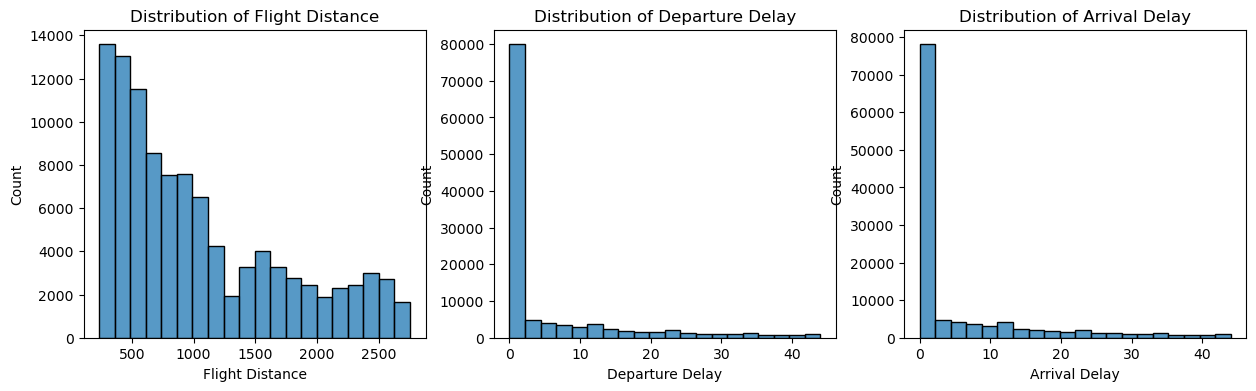

In [18]:
fig,ax = plt.subplots(1,3,figsize=(15,4))
# for ind,i in enumerate(df.select_dtypes("number").drop(columns="Age").columns):
for ind,i in enumerate(df[non_cat_columns].drop(columns="Age")):
    q1,q9 = df[i].quantile([0.1,0.9])
    mask = df[i].between(q1,q9)
    sns.histplot(data=df[mask],x=i,ax=ax[ind],bins=20)
    ax[ind].set_title(f"Distribution of {i}")

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> After cutting from 0.1 and 0.9 quantiles  
> Not alot happened [ at least here in histogram ]

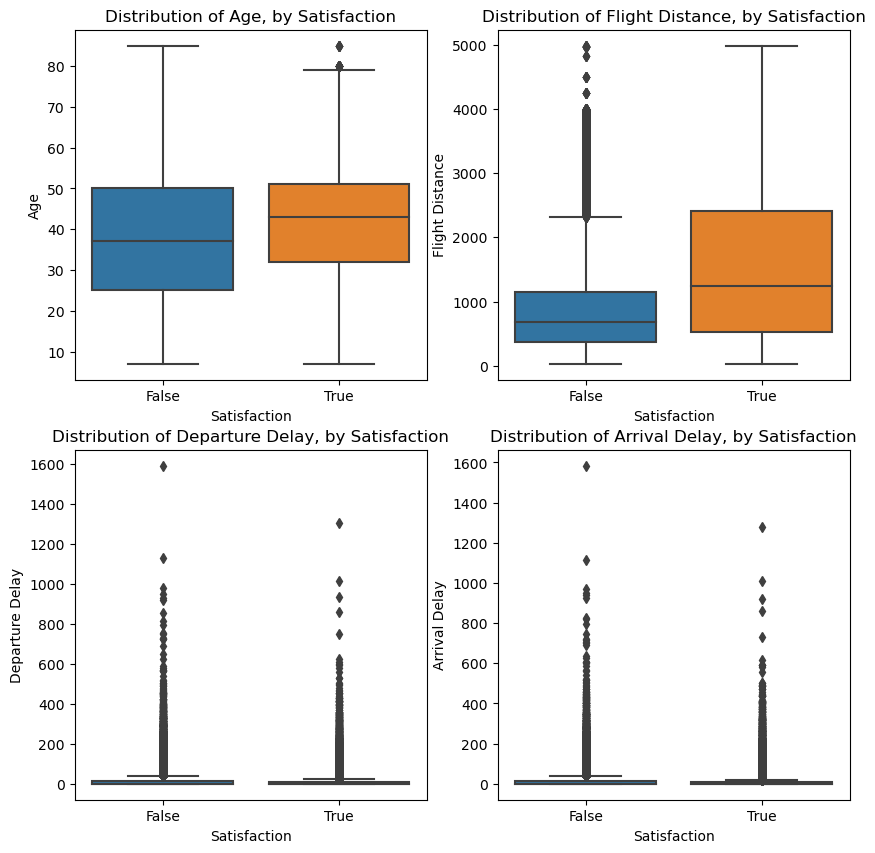

In [19]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for ind,i in enumerate(df[non_cat_columns].columns):
    sns.boxplot(data=df,x="Satisfaction" ,y=i,ax=ax[ind//2,ind%2])
    ax[ind//2,ind%2].set_title(f"Distribution of {i}, by Satisfaction")

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> From The box plots we can see that
>> - `Older` people tend to be more satisfied
>> - `Longer` flights have more satisfied people [ Which is not expected ]
>> - can't figure anything from Arrival and Debarture delay because of Outliers
So let's do some masking 

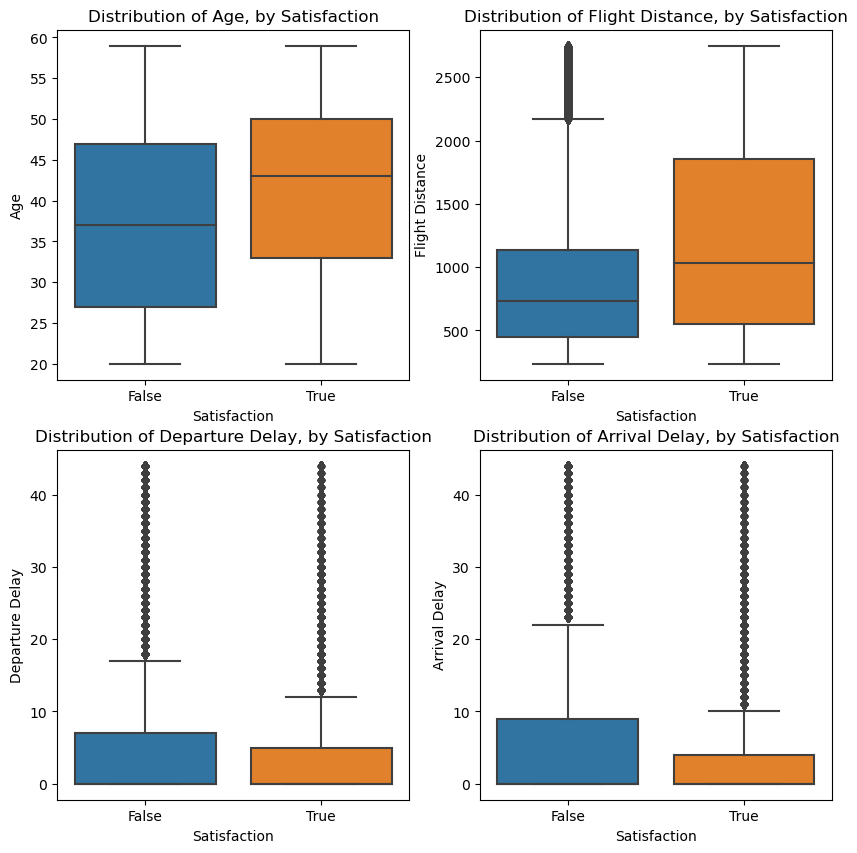

In [20]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
for ind,i in enumerate(df[non_cat_columns].columns):
    q1,q9 = df[i].quantile([0.1,0.9])
    mask = df[i].between(q1,q9)
    sns.boxplot(data=df[mask],x="Satisfaction" ,y=i,ax=ax[ind//2,ind%2])
    ax[ind//2,ind%2].set_title(f"Distribution of {i}, by Satisfaction")

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> After mask we see that 
>> `More Delay` almost equals more `unsatifaction`


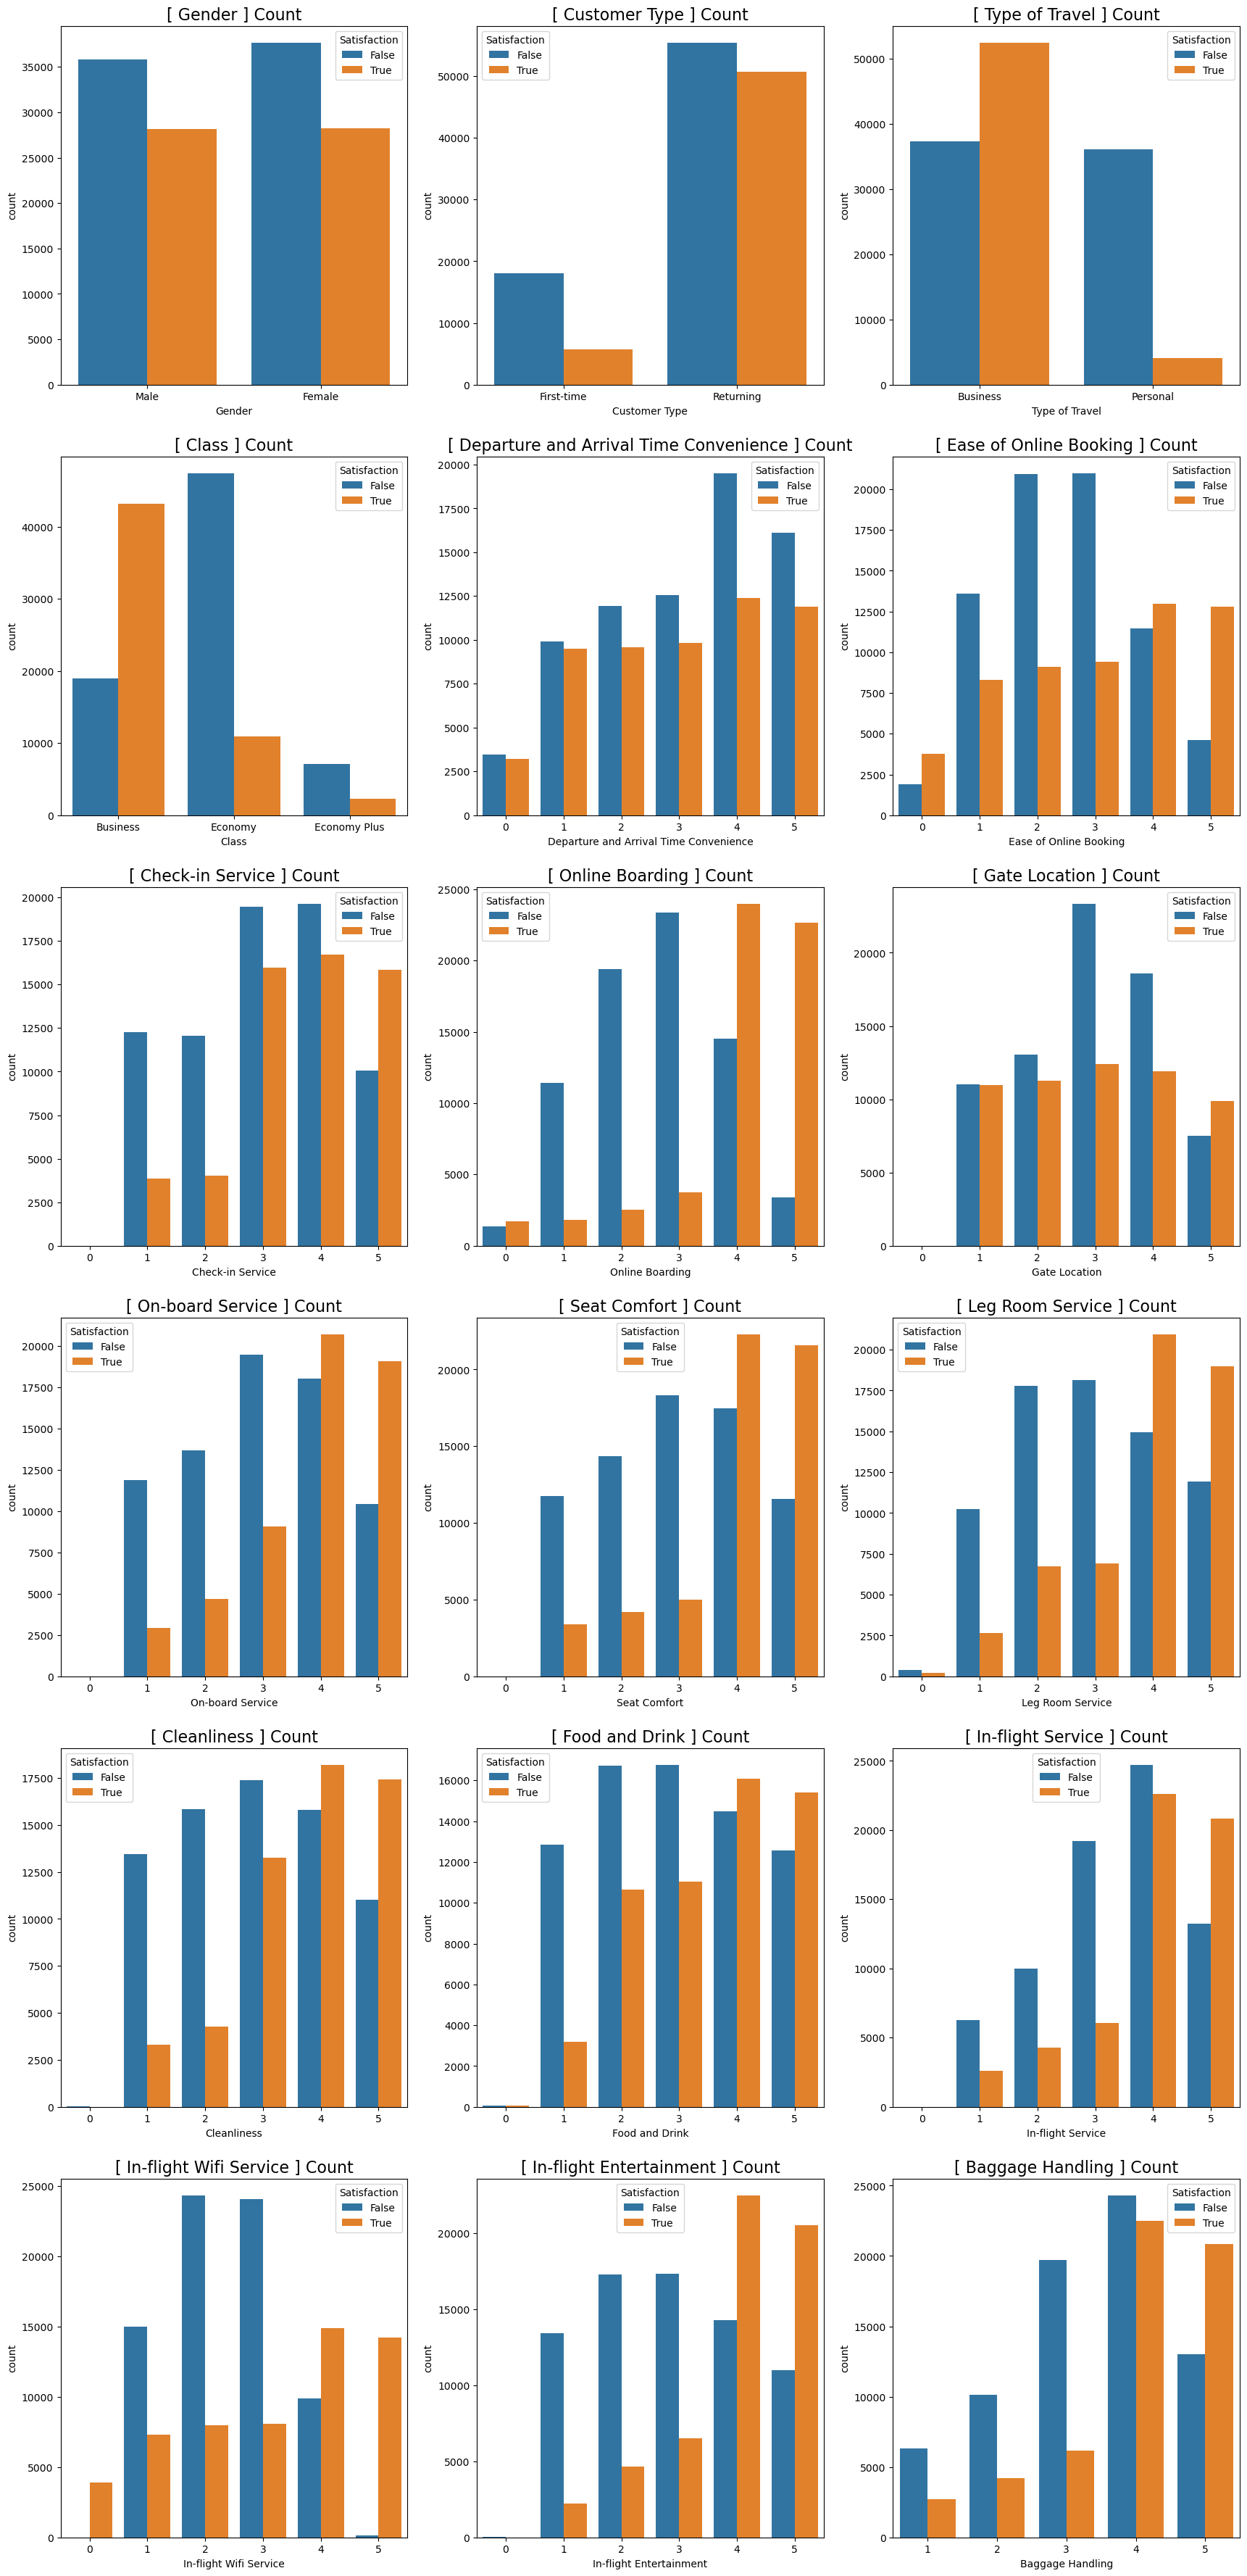

In [21]:
fig,ax = plt.subplots(6,3,figsize=(21,45))
for ind,i in enumerate(df.drop(columns=non_cat_columns).drop(columns="Satisfaction").columns):
    sns.countplot(data=df,x=i,ax=ax[ind//3,ind%3],hue="Satisfaction")
    ax[ind//3,ind%3].set_title(f"[ {i} ] Count",fontsize=16)

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> From plots we conclude that :  

> - `Females are more that Males` with the same average of satisfaction
> - `Customers of First time` tend to be unsatisfied, on the contrary, Returning customers have almost equal [ satis & unsatis ]
> - `People who fly for purpose of business` tend to be more satisfied, unlike `people who fly for personal purposes`

> -  Most people of `business class` are satisfied, unlike people of `economy class` [ most of them unsatisfied ] as well as `economy plus`
> - `Most flights are convinient`, but it doesn't have a big relation with Satisfaction
> - It is obvious that the better ease of `online booking`, the more satisfied passengers

> - The same here for `Check-in service`
> - The same here for `Online boarding`, but it is obvious that It really affects overall satisfaction of the passenger
> - `Gate location` doesn't seem to affect the satisfaction

> - `On-board service` like services discussed above affects the satisfaction of the passengers
> - Same here for `Seat comfort` 

>  Not to waste your time all other kind of services affects overall satisfaction with the same almost distribution 

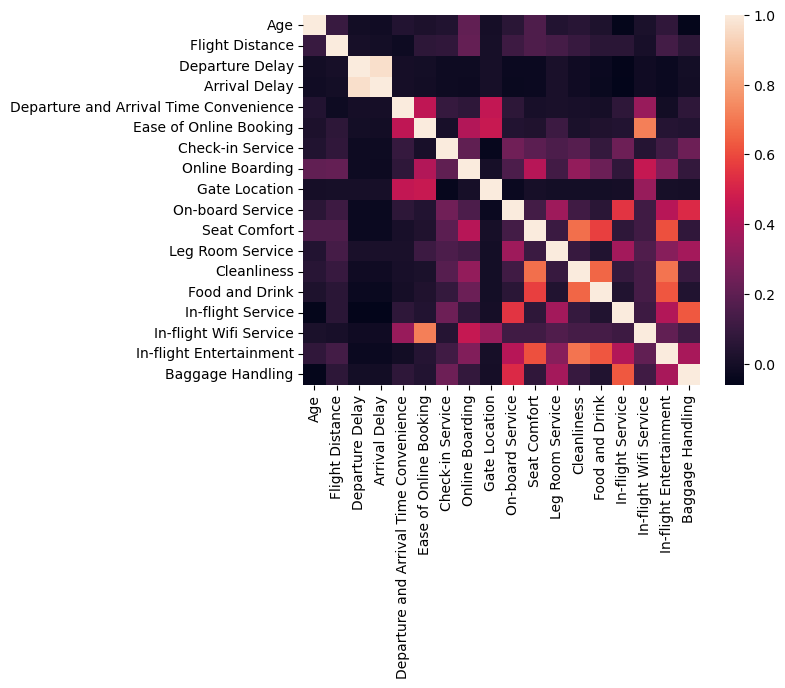

In [22]:
corr = df.drop(columns="Satisfaction").corr()
sns.heatmap(data=corr);

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> Here we see that `Departure Delay` & `Arrival Delay` have high collinear relationship

>> If this was regression task we would have to remove one of them, but in classification task, it is not a big deal


<p style="text-align:left;padding:10px;background-color:#eee;color:#222;border-radius:5px;font-size:1.2em">
I know that there are more visualzation for EDA <br><br>
    But, I'd like to build a model instead :)
</p>


-------------------

<h2 style="text-align:left;padding:10px;background-color:#154949;color:#ffe;border-radius:5px;font:bold;font-size:2.25em">
    Build Model

</h2>

In [23]:
target = "Satisfaction"
y = df[target]
X = df.drop(columns=target)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (129880, 22)
y shape: (129880,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=ord("H"))
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (103904, 22)
y_train shape: (103904,)
X_test shape: (25976, 22)
y_test shape: (25976,)


<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> Just splitting the data


In [25]:
baseline_acc = df[target].value_counts(normalize=True).max()
print("Baseline Accuracy:", round(baseline_acc, 2))

Baseline Accuracy: 0.57


<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> Setting `baseline` to break :)


In [26]:
models = [
    LogisticRegression(random_state = ord("H")),
    DecisionTreeClassifier(random_state = ord("H")),
    RandomForestClassifier(random_state = ord("H")),
    GradientBoostingClassifier(random_state = 42),
]
models_scores = pd.DataFrame(columns = ["accuracy",'time'])

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> The models that we will iterate throw


In [27]:
for i, model in enumerate(models):
    start=time()
    if i==0:
        clf = make_pipeline(OneHotEncoder(use_cat_names=True),SimpleImputer(),model)
        clf.fit(X_train,y_train)
    else :
        clf = make_pipeline(OrdinalEncoder(),SimpleImputer(),model)
        clf.fit(X_train,y_train)
    end = time()
    estimate = round(end -start,2)
    acc = clf.score(X_train,y_train)
    models_scores.loc[model.__class__.__name__] = [acc,estimate]
    print(estimate)

2.49
1.61
24.11
27.78


<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> Training the models and getting their accuracy and the time they took for training and getting accuracy score
> - Here I will settle with accuracy metric 


In [28]:
models_scores.sort_values(by="accuracy",ascending=False)

,accuracy,time
DecisionTreeClassifier,1.000000,1.61
RandomForestClassifier,1.000000,24.11
GradientBoostingClassifier,0.943775,27.78
LogisticRegression,0.816946,2.49


<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> DecisionTree & RandomForest got the highest accuracy for training data
> - I have to choose one, So I will pick RandomForest


In [29]:
clf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = ord("H"))
)

In [30]:
params = {
    "simpleimputer__strategy":["mean","median"],
    "randomforestclassifier__n_estimators":range(50,101,50),
    "randomforestclassifier__max_depth":range(20,41,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(50, 101, 50),
 'randomforestclassifier__max_depth': range(20, 41, 10)}

In [31]:
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=72))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(20, 41, 10),
                         'randomforestclassifier__n_estimators': range(50, 101, 50),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> Here I am making a `Grid` for `tuning` the model and getting the best set of parameters

In [32]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=72))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(20, 41, 10),
                         'randomforestclassifier__n_estimators': range(50, 101, 50),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [39]:
results = pd.DataFrame(model.cv_results_)
results.sort_values(by="rank_test_score",ascending=False).tail()[::-1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,32.009539,1.918138,1.333878,0.248089,30,100,mean,"{'randomforestclassifier__max_depth': 30, 'randomforestclassifier__n_estimators': 100, 'simpleimputer__strategy': 'mean'}",0.964824,0.964487,0.960878,0.962803,0.961309,0.962860,0.001603,1
10,30.498246,0.817609,0.984413,0.204912,40,100,mean,"{'randomforestclassifier__max_depth': 40, 'randomforestclassifier__n_estimators': 100, 'simpleimputer__strategy': 'mean'}",0.963765,0.964342,0.959963,0.963188,0.961598,0.962571,0.001593,2
2,26.046364,2.439833,0.975411,0.165303,20,100,mean,"{'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 100, 'simpleimputer__strategy': 'mean'}",0.964102,0.963957,0.960830,0.962418,0.960876,0.962436,0.001422,3
11,23.279734,4.398540,0.716259,0.117593,40,100,median,"{'randomforestclassifier__max_depth': 40, 'randomforestclassifier__n_estimators': 100, 'simpleimputer__strategy': 'median'}",0.963188,0.964342,0.960493,0.962658,0.961309,0.962398,0.001363,4
3,27.034845,3.270169,1.021736,0.156855,20,100,median,"{'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 100, 'simpleimputer__strategy': 'median'}",0.964198,0.963380,0.960300,0.962129,0.961694,0.962340,0.001353,5


In [40]:
model.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 100,
 'simpleimputer__strategy': 'mean'}

<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> After 60 different fits, We see that Best params are 

> - **max_depth: 30**
> - **n_estimators: 100**
> - **imputation_strategy: mean**

-------------

<h2 style="text-align:left;padding:10px;background-color:#154949;color:#ffe;border-radius:5px;font:bold;font-size:2.25em">
Communicate Results

</h2>

In [41]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9605


<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>

> I think That's really nice result for test set


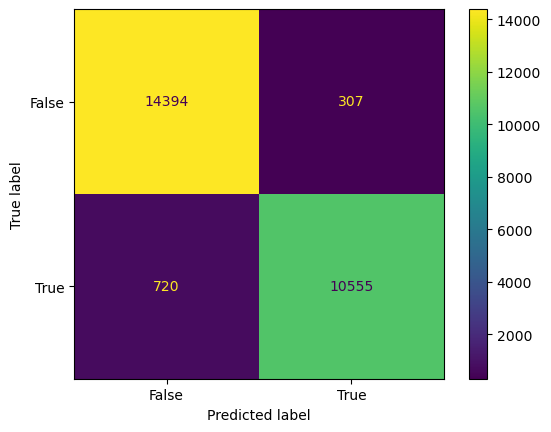

In [42]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

In [44]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97     14701
        True       0.97      0.94      0.95     11275

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



<span style="background-color:#333;color:#fff;padding:5px;border-radius:5px;margin:5px;font-size:1.25em;">
Insights : 

</span>


>>> **We here see that our model did great in terms of metrics**

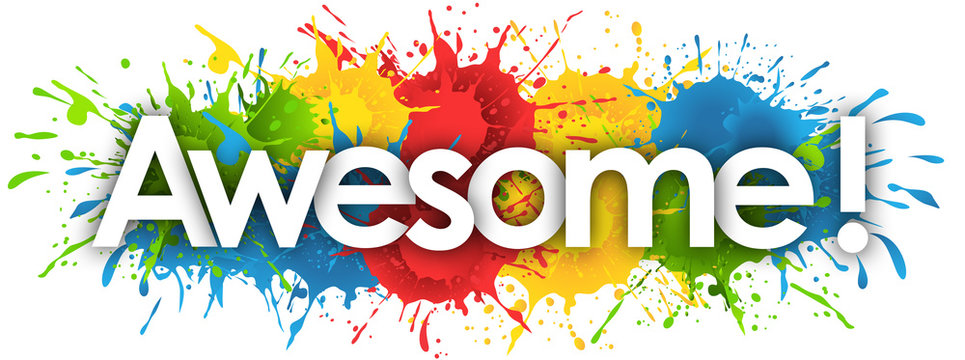